<a href="https://colab.research.google.com/github/github876545678/github876545678/blob/main/Avtomobil_qiym%C9%99tl%C9%99ndirm%C9%99_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1) Import Modules**


In [3]:
import numpy as np
import pandas as pd


In [4]:
df= pd.read_csv("/content/car-sales.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')


**2) Data Checks to** **Perform**



In [6]:
df.isnull().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,object


In [9]:
df.nunique()

,0
Make,4
Colour,5
Odometer (KM),10
Doors,3
Price,9


In [10]:
df.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [11]:
categorical_columns = ['Make','Colour']

for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")

Category in Make is : ['Toyota' 'Honda' 'BMW' 'Nissan']
Category in Colour is : ['White' 'Red' 'Blue' 'Black' 'Green']


**3) Exploratory data analysis**

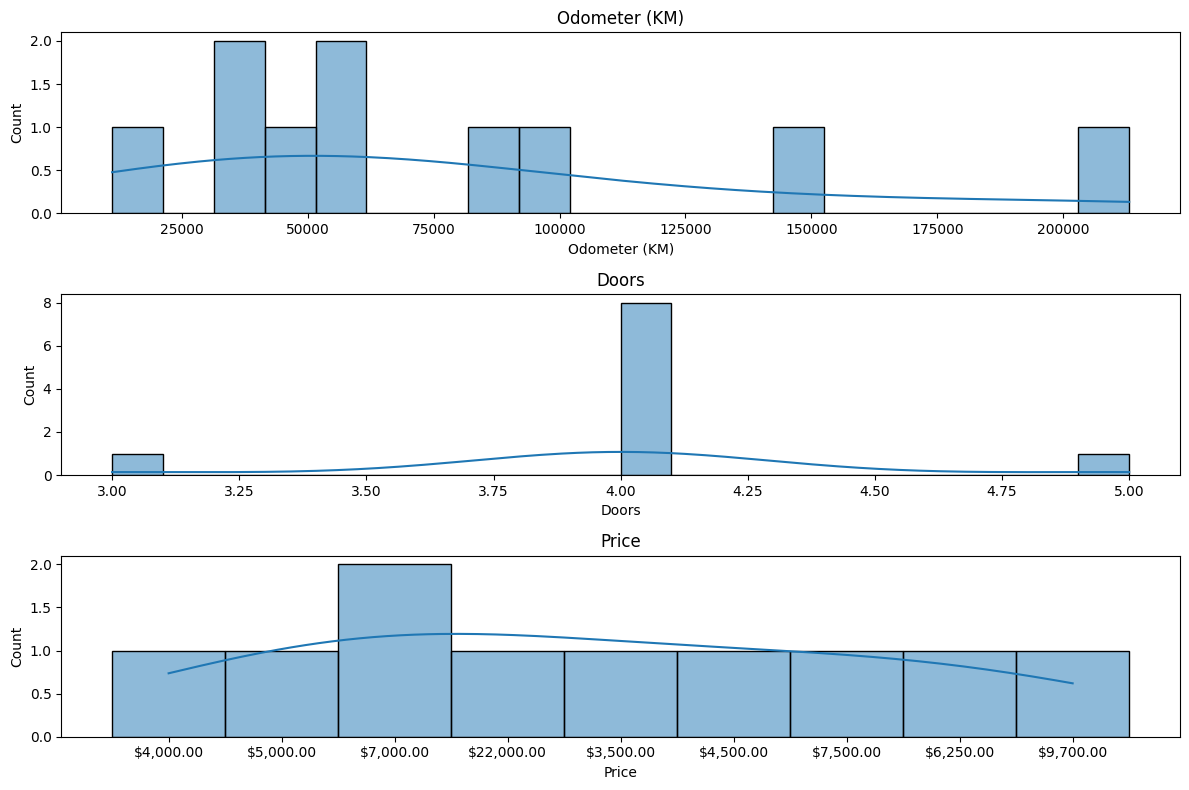

In [12]:

numerical_features = ['Odometer (KM)','Doors','Price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 1, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

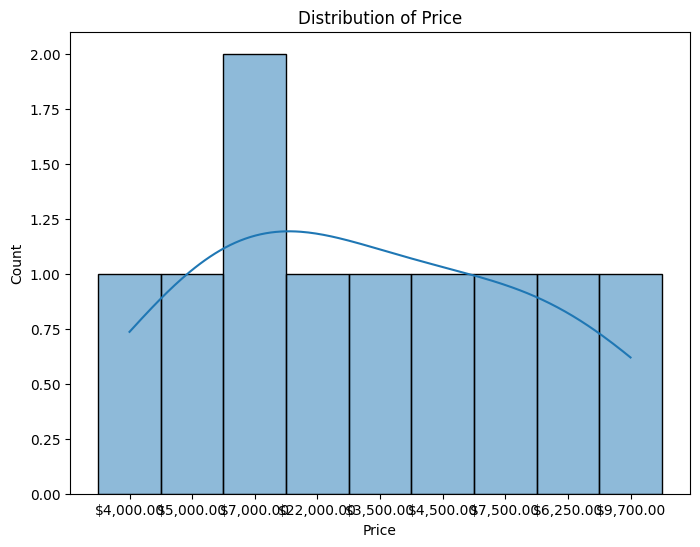

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

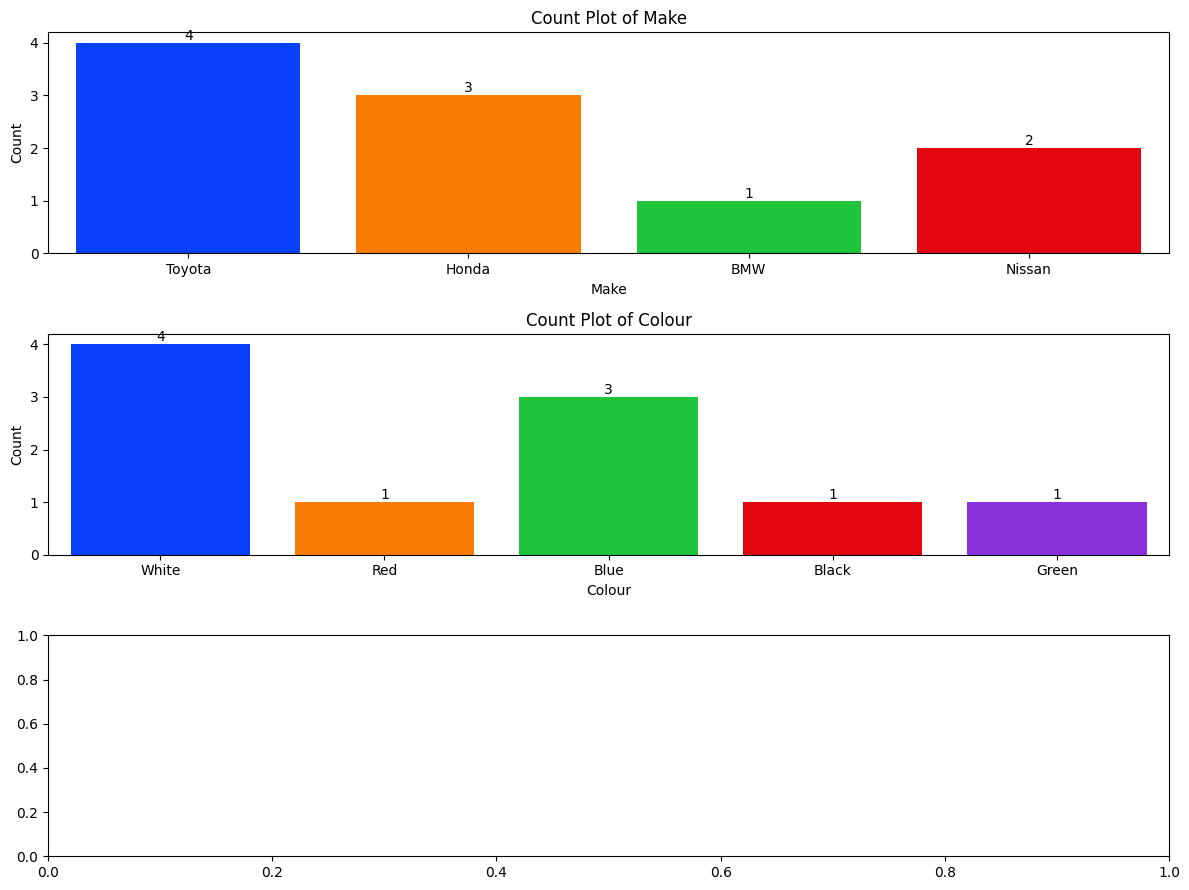

In [14]:
categorical_columns = ['Make','Colour']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


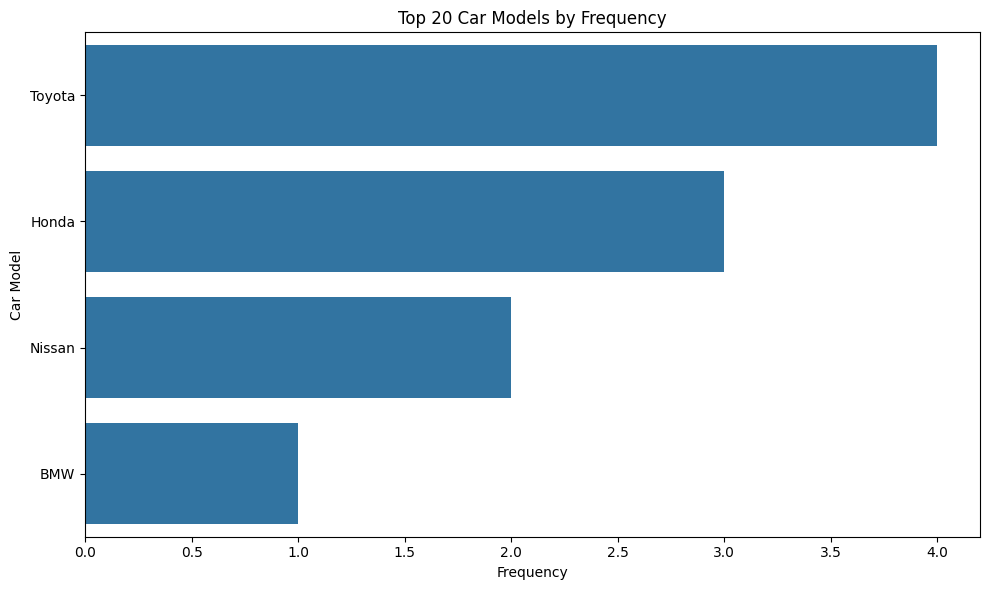

In [15]:
n = 20  # Number of top car models to plot
top_car_models = df['Make'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [16]:
df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True)  # Dollar və vergül işarələrini silir
df['Price'] = pd.to_numeric(df['Price'])  # Rəqəm tipinə çevirir

# Yenilənmiş məlumatları göstərmək üçün:
print(df['Price'].head())

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
Name: Price, dtype: float64


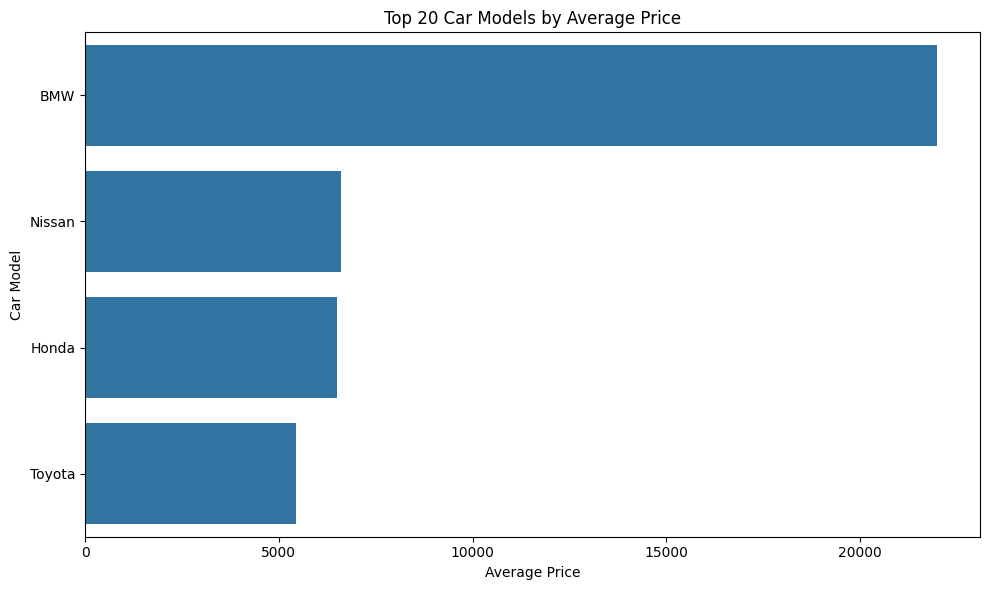

In [17]:
avg_prices_by_car = df.groupby('Make')['Price'].mean().sort_values(ascending=False)



n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

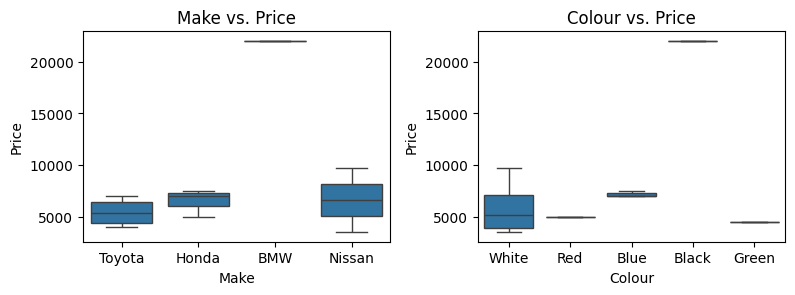

In [18]:
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

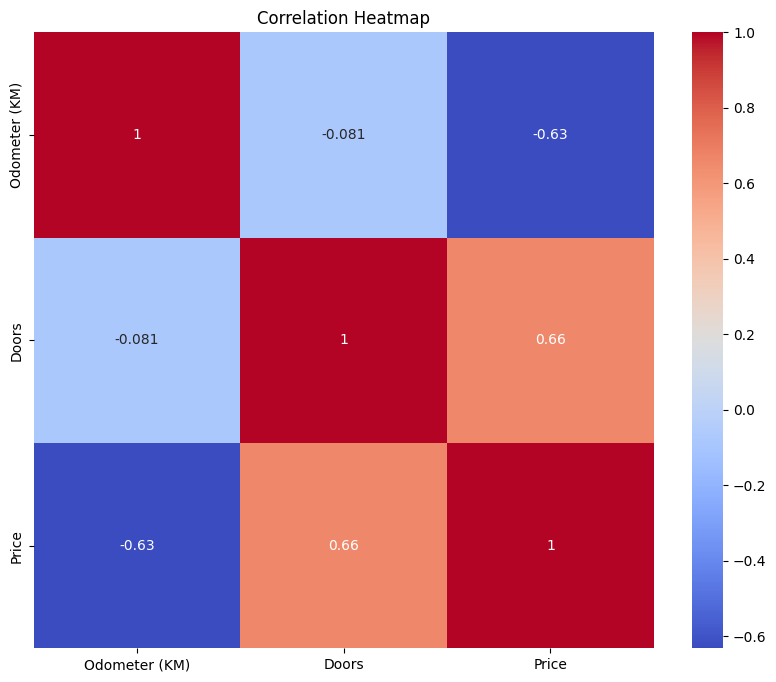

In [19]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Sütunu string formatına çevirmək
df['Make'] = df['Make'].astype(str)

# Brand və model dəyərlərini çıxarmaq
df['brand'] = df['Make'].apply(lambda x: x.split(' ')[0])
df['model'] = df['Make'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Kateqorial və rəqəmli sütunları təyin etmək
categorical_columns = ['Make', 'Colour']
numerical_columns = ['Odometer (KM)','Doors','Price']



 **5) Train the Model**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Məlumat dəstini yükləmək (nümunə məlumatlar)
data = {
    'Make': ['Toyota', 'Honda', 'Ford', 'BMW', 'Mercedes'],
    'Model': ['Corolla', 'Civic', 'Focus', 'X5', 'C-Class'],
    'Year': [2010, 2012, 2015, 2018, 2020],
    'Odometer (KM)': [150000, 120000, 90000, 50000, 30000],
    'Price': [12000, 15000, 13000, 40000, 50000]
}
df = pd.DataFrame(data)

# Məlumatdakı boş dəyərləri idarə etmək
df.fillna(0, inplace=True)

# X və y-ni təyin etmək
X = df.drop(['Price'], axis=1)  # Qiymət sütunu
y = df['Price']

# Kateqorial sütunları tapmaq
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encoding tətbiq etmək
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output düzgün arqumentdir
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))

# Yeni sütunları orijinal DataFrame-ə əlavə etmək
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
X = X.drop(categorical_columns, axis=1)  # Orijinal kateqorial sütunları silirik
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Məlumatı tren və test dəstlərinə bölmək
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin öyrədilməsi
model = LinearRegression()
model.fit(X_train, y_train)

# Proqnozlar
y_pred = model.predict(X_test)

# Nəticələrin qiymətləndirilməsi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Proqnozlar: {y_pred}")
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")



Proqnozlar: [15811.04650399]
Mean Squared Error: 657796.4316416256
R²: nan


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Məlumat dəstini yükləmək (məsələn, CSV faylı)
# df = pd.read_csv('data.csv')  # Öz məlumat dəstinizi buraya yükləyin

# CarName sütunundan brand və model çıxarmaq
df['brand'] = df['Make'].apply(lambda x: str(x).split(' ')[0])  # Make sütununu string-ə çevir
df['model'] = df['Make'].apply(lambda x: ' '.join(str(x).split(' ')[1:]))

# Məlumatdakı boş dəyərləri idarə etmək
df = df.fillna(0)  # 0 ilə doldurur (daha yaxşı metod seçə bilərsiniz)

# Məlumatı bölmək
X = df.drop(['Price', 'Make'], axis=1)  # 'Make' sütunu çıxarılır
y = df['Price']

# Kateqorial sütunları tapmaq
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encoding tətbiq etmək
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output=False
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))

# Yeni sütunları əsas datasetə əlavə etmək
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
X = X.drop(categorical_columns, axis=1)  # Mətn sütunlarını silirik
X = pd.concat([X, X_encoded], axis=1)  # Yeni kodlaşdırılmış sütunları əlavə edirik

# Məlumatı tren və test dəstlərinə bölmək
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin öyrədilməsi
model = LinearRegression()
model.fit(X_train, y_train)

# Təxminlər
y_pred = model.predict(X_test)

# Nəticələri görmək üçün
print(y_pred)  # Test dəstinə qarşı proqnozlar


[15811.04650399]


In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')


 R-squared: nan
Mean Squared Error: 657796.4316413895


In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
1,15000,15811.046504,-811.046504
